In [ ]:
import numpy as np
import glob
import sys
import pickle
from datetime import datetime, timezone
import pandas as pd
import matplotlib.pyplot as plt
import healpy as hp
import gc

sys.path.append('/home/keisuke/script/script/')
from gbpipe_package import gbpipe
from gb_cal.misc.misc import get_moon_altaz_skm, get_moon_astro_skm, _astro_pos, save_pkl, read_pkl
from gb_cal.readdata.planet_center import calc_rmat_mc, calc_mc_data
import mkid_pylibs as klib
from mkid_pylibs.rhea_comm.lib_read_rhea  import *
from analyzer_db.kidslist import KidsList

sys.path.append('/home/keisuke/script/script/gbproc_cpp/build')
import gbirdproc as gbp
sys.path.append('/home/keisuke/analysis/moon/gb_cal/readdata/')
from read_raw_moon import read_rawdata_cpp

In [ ]:
CHIPS = np.array(['3A',   '2A',   '3B',   '1A',   '2B',   '1B',   '220'])
DAQS  = np.array(['GB01', 'GB02', 'GB03', 'GB04', 'GB05', 'GB06', 'GB07'])
SAVEDIR = '/data/keisuke/gb/save/'

In [ ]:
# ============ select the meas_id you want to check ============
meas_id = 6550

In [4]:
data = read_rawdata_cpp(meas_id)

GB07
220
[-89.357, -79.794, -77.063, -66.789, -59.686, -46.402, -36.462, -33.564, -17.011, -11.836, -4.213, 4.029, 10.183, 26.21, 47.546, 49.313, 53.296, 66.106, 70.894, 77.021, -86.7, -83.11, -74.72, -64.15, -57.09, -43.76, -39.95, -30.98, -14.37, -9.2, -7.54, 6.49, 12.67, 28.9, 44.23, 51.025, 55.89, 68.89, 73.63, 79.89, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
0
3596403, 0, 3596.4
======== Fit KID00 ==========
['gaolinbg2f', 'gaolinbg2l', 'gaolinbg', 'blank', 'mazinrev', 'gao']
============= slice =================
71
369
fitter is not used gaolinbg2
------------params in kidfit---------
----------Prefit-------------
None
ADD PARAM -> arga                 : <class 'inspect._empty'>
ADD PARAM -> absa                 : <class 'inspect._empty'>
ADD PARAM -> tau                  : <class 'inspect._empty'>
ADD PARAM -> fr                   : <class 'inspect._empty'>
ADD PARAM -> Qr                   : <class 'inspect._empty'>
ADD PARAM -> Qc                 

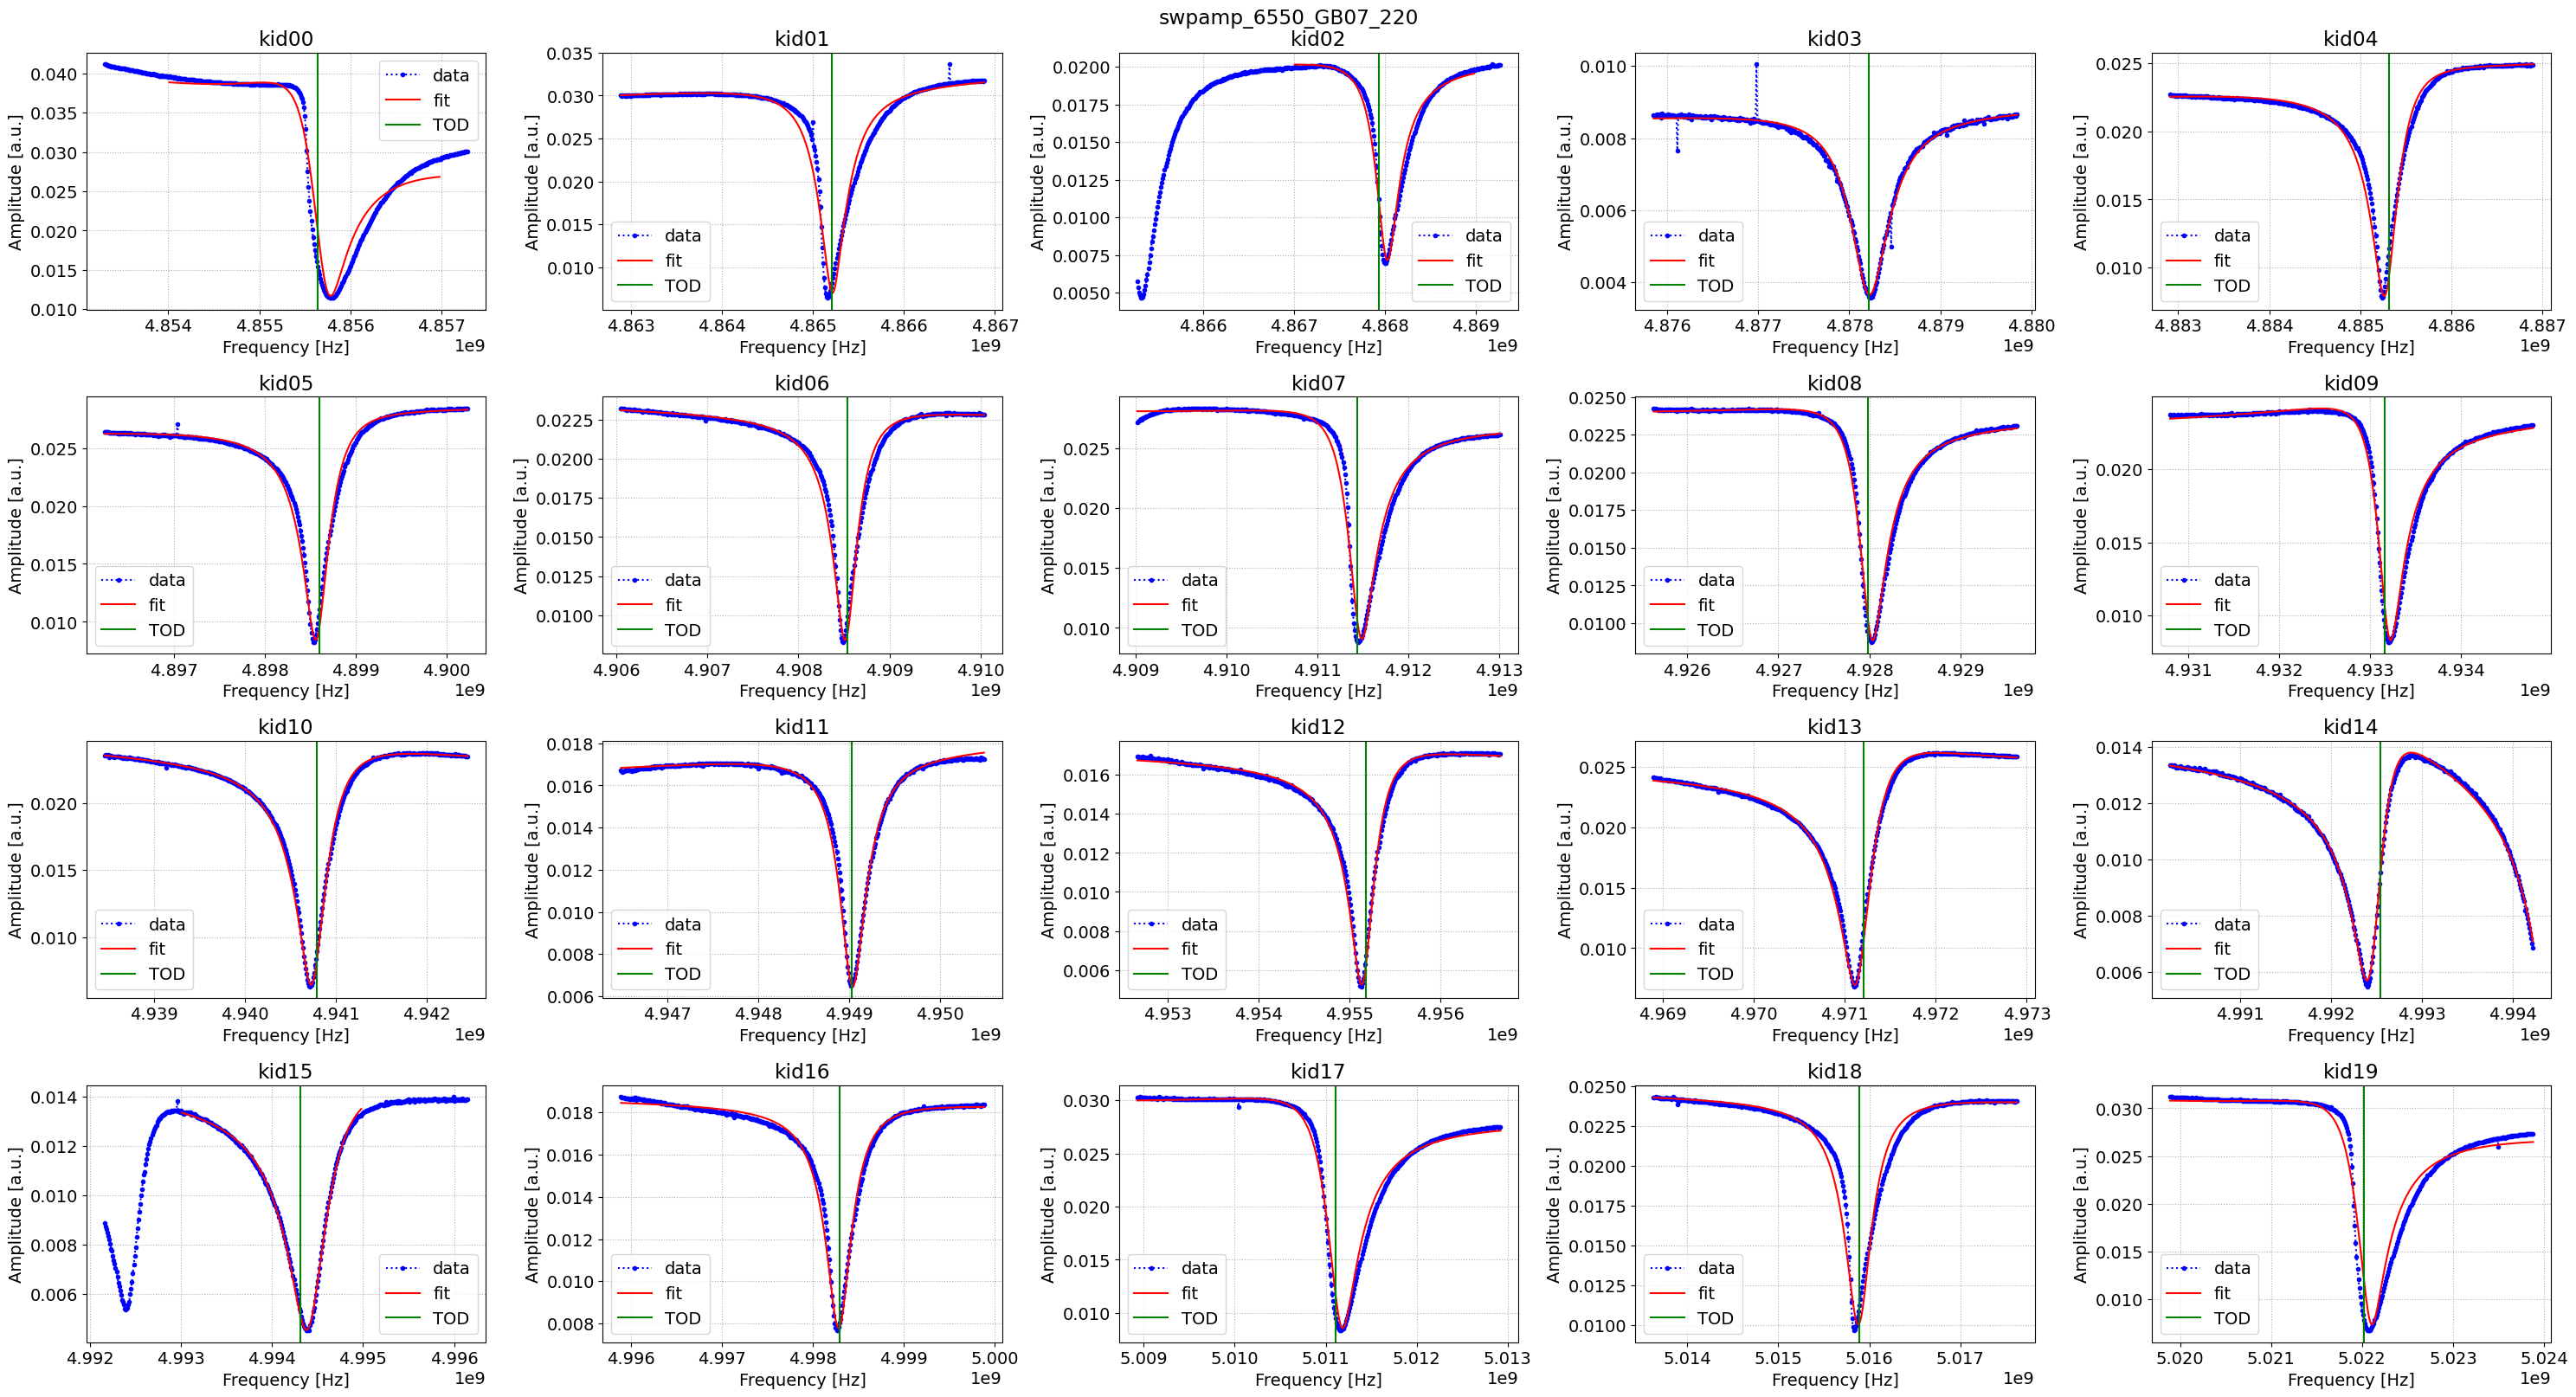

In [5]:
data.plot_swpamp()

start plot_log!
[datetime.datetime(2023, 12, 2, 6, 9, 14, 100595, tzinfo=datetime.timezone.utc)
 datetime.datetime(2023, 12, 2, 6, 9, 14, 101596, tzinfo=datetime.timezone.utc)
 datetime.datetime(2023, 12, 2, 6, 9, 14, 102596, tzinfo=datetime.timezone.utc)
 ...
 datetime.datetime(2023, 12, 2, 7, 9, 10, 428346, tzinfo=datetime.timezone.utc)
 datetime.datetime(2023, 12, 2, 7, 9, 10, 429346, tzinfo=datetime.timezone.utc)
 datetime.datetime(2023, 12, 2, 7, 9, 10, 430346, tzinfo=datetime.timezone.utc)]
plot_log is <function plot_log at 0x74805d75bc70>
plot_log finished!


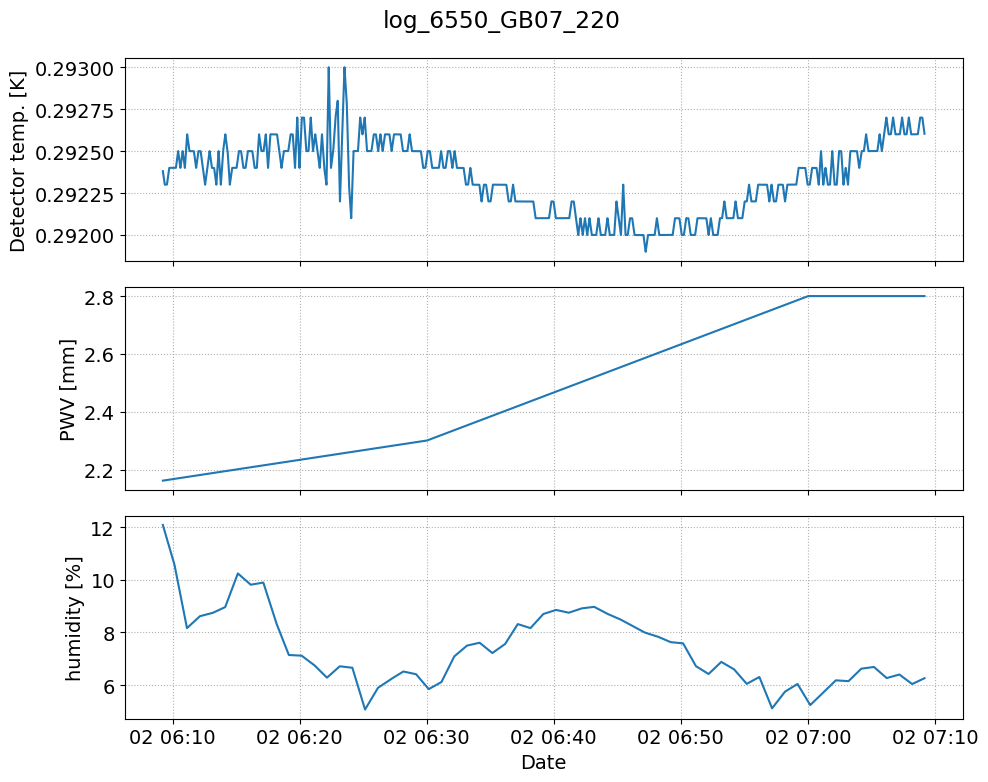

In [6]:
data.plot_log()

In [7]:
data.save_swpparam()

save_swpparam
              fr            Qr            Qc            Qi
0   4.855624e+09   9005.376726  11588.902947  21989.628920
1   4.865205e+09   9618.768598  12388.599039  42838.409514
2   4.868000e+09  12189.707147  18625.811219  34098.210915
3   4.878209e+09   7540.140891  12966.254098  17967.062604
4   4.885313e+09  10400.522732  15133.191141  30810.074786
5   4.898597e+09  10255.743009  14579.015487  32933.466840
6   4.908537e+09  11722.794176  18351.492040  31761.593480
7   4.911435e+09  10359.517468  14980.887903  30701.610200
8   4.927988e+09  10886.027849  16848.321235  28516.286452
9   4.933163e+09  11280.199094  16506.295553  30925.650517
10  4.940786e+09   8917.225868  11935.581416  32089.139975
11  4.949029e+09  10853.631543  17208.182710  29335.146715
12  4.955183e+09  11068.300442  15605.355760  34806.989811
13  4.971210e+09   8746.419881  11283.682948  29720.916899
14  4.992504e+09  11005.725750  18510.390925  20325.698713
15  4.994458e+09   7130.414127  10135.4496

In [8]:
data.calc_maxind()

calc_maxinds is [2064591 1974300 1836241 1559741 1385552 2028499 1613900 1764016 1157196
 1998418 1361469 1187280 1553689 1782083 1235399 1986360 1812167 1583814
 1133068 1421647]


<SkyCoord (AltAz: obstime=2023-12-02 06:43:38.704708, location=(5390626.40643125, -1596776.28788388, 3006957.06460938) m, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt, distance) in (deg, deg, AU)
    (262.24708895, 67.49729671, 0.0026372)>
moon position showed!
<SkyCoord (AltAz: obstime=2023-12-02 06:42:08.413135, location=(5390626.40643125, -1596776.28788388, 3006957.06460938) m, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt, distance) in (deg, deg, AU)
    (261.97465381, 67.8207035, 0.00263709)>
moon position showed!
<SkyCoord (AltAz: obstime=2023-12-02 06:39:50.353259, location=(5390626.40643125, -1596776.28788388, 3006957.06460938) m, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt, distance) in (deg, deg, AU)
    (261.54739932, 68.31481362, 0.00263692)>
moon position showed!
<SkyCoord (AltAz: obstime=2023-12-02 06:35:13.851505, location=(5390626.

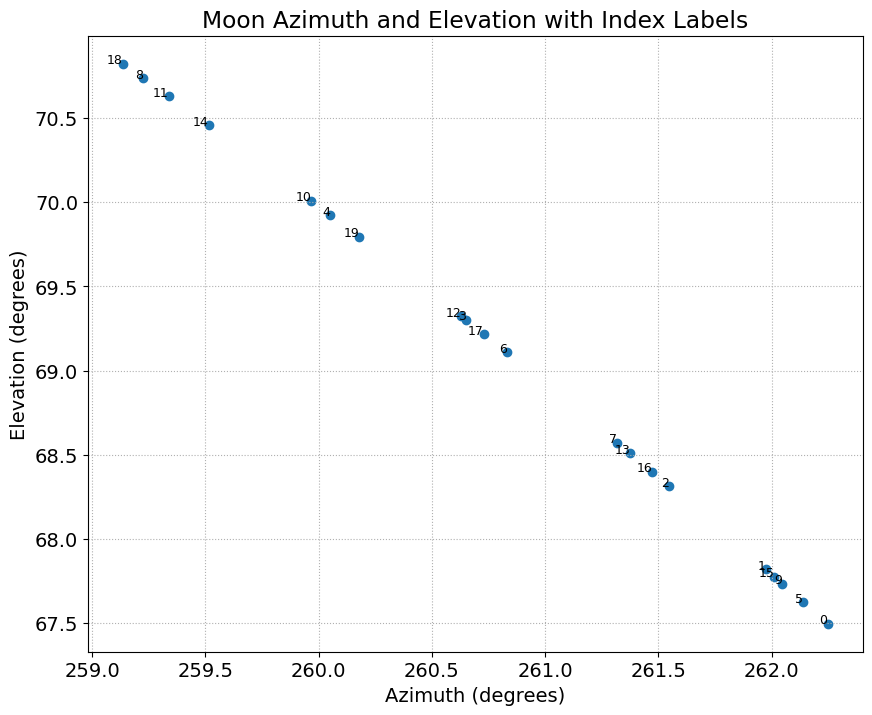

save moon_pos!


<Figure size 1200x900 with 0 Axes>

In [9]:
data.calc_offset()

In [10]:
data.save_offset()

In [11]:
data.calc_mc()

        Use get_body("moon") instead. [gb_cal.misc.misc]


rmat_inv is [[[-0.07201718 -0.9614701   0.26530883]
  [ 0.25187329 -0.27490953 -0.92789256]
  [ 0.96507687 -0.          0.26196685]]

 [[-0.07201718 -0.96147013  0.26530874]
  [ 0.25187336 -0.27490944 -0.92789257]
  [ 0.96507686 -0.          0.26196691]]

 [[-0.07201717 -0.96147015  0.26530864]
  [ 0.25187342 -0.27490935 -0.92789258]
  [ 0.96507684 -0.          0.26196697]]

 ...

 [[-0.03097158 -0.99782306  0.05822285]
  [ 0.46861399 -0.065948   -0.88093802]
  [ 0.88285995 -0.          0.46963636]]

 [[-0.03097157 -0.99782306  0.05822281]
  [ 0.46861404 -0.06594796 -0.88093799]
  [ 0.88285992 -0.          0.46963641]]

 [[-0.03097155 -0.99782307  0.05822278]
  [ 0.4686141  -0.06594792 -0.88093796]
  [ 0.88285989 -0.          0.46963647]]]
mc_theta is [array([56.82838329, 56.81346556, 56.79851014, ..., 81.2193734 ,
       81.23053352, 81.24187224]), array([55.09164103, 55.0803047 , 55.068948  , ..., 82.42973787,
       82.43795843, 82.44630467]), array([57.27630157, 57.26224493, 57.248

In [12]:
data.make_mcdata()

{'kidid': 0,
 'utime': array([1.70149735e+09, 1.70149735e+09, 1.70149735e+09, ...,
        1.70150095e+09, 1.70150095e+09, 1.70150095e+09]),
 'phase': array([0.49750996, 0.49663699, 0.49778335, ..., 0.39396564, 0.39366067,
        0.39405184]),
 'theta': array([56.82838329, 56.81346556, 56.79851014, ..., 81.2193734 ,
        81.23053352, 81.24187224]),
 'phi': array([345.06820826, 345.08908057, 345.11005883, ...,  12.39646558,
         12.37662777,  12.35643068])}

In [13]:
data.save_mcdata()

fitdata is {'utime': array([1.70149884e+09, 1.70149884e+09, 1.70149884e+09, ...,
       1.70149997e+09, 1.70149997e+09, 1.70149997e+09]), 'theta': array([ 1.9994098 ,  1.97866549,  1.98056104, ..., -1.99821633,
       -1.99900767, -1.99981787]), 'phi': array([-1.98230442,  1.98155879,  1.95906459, ..., -0.82760411,
       -0.85023108, -0.87279152]), 'phase': array([0.43798577, 0.43470336, 0.43561079, ..., 0.38815049, 0.38756532,
       0.38808661])}


In [14]:
data.save_mcdata_all()

fitdata is {'utime': array([1.70149884e+09, 1.70149884e+09, 1.70149884e+09, ...,
       1.70149997e+09, 1.70149997e+09, 1.70149997e+09]), 'theta': array([ 1.9994098 ,  1.97866549,  1.98056104, ..., -1.99821633,
       -1.99900767, -1.99981787]), 'phi': array([-1.98230442,  1.98155879,  1.95906459, ..., -0.82760411,
       -0.85023108, -0.87279152]), 'phase': array([0.43798577, 0.43470336, 0.43561079, ..., 0.38815049, 0.38756532,
       0.38808661])}
fitdata is {'utime': array([1.70149875e+09, 1.70149875e+09, 1.70149875e+09, ...,
       1.70149988e+09, 1.70149988e+09, 1.70149988e+09]), 'theta': array([ 1.99610894,  1.99798896,  1.99988025, ..., -1.99815142,
       -1.9989273 , -1.99971712]), 'phi': array([ 1.99444484,  1.97263731,  1.95045157, ..., -0.81573781,
       -0.83788083, -0.85983707]), 'phase': array([0.30032086, 0.30052011, 0.3000515 , ..., 0.23364703, 0.23362002,
       0.23178399])}
fitdata is {'utime': array([1.70149861e+09, 1.70149861e+09, 1.70149861e+09, ...,
       1.70